# DATA PREPARATION

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tokenizer
!pip install ekphrasis
!pip install transformers
!pip install wordninja
!pip install emoji
!pip install spacy_udpipe
!pip install language_tool_python
!pip install compound-word-splitter
!pip install pyenchant
!pip install enchant
!sudo apt-get install enchant
!sudo apt-get install hunspell-it
!pip install pyenchant



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541529 sha256=f5290901e847a797b9deb911fe27fe75686f04c9c2e62a15112fb1107629c2f0
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for compound-word-splitter: filename=comp

In [ ]:
import pandas as pd
import csv
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from tokenizer import *
from nltk.corpus import stopwords

from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

import wordninja

from nltk.stem import SnowballStemmer

import ast

import emoji
import unicodedata

import gzip

import spacy_udpipe
import language_tool_python

import splitter
import enchant
from itertools import groupby
import string

import sys
import os


In [ ]:
# directory name:
input_dir = '/content/drive/MyDrive/HLT-PRJ/dataset2/dataset_test_evalita/'
output_dir = '/content/drive/My Drive/HLT-PRJ/dataset_test_evalita_preprocessed/'
input_dir_preprocessing = '/content/drive/My Drive/HLT-PRJ/dataset2/preprocessing/'

# Spec
pd.set_option("display.max_colwidth", None)

In [ ]:
#tsv_tweets_file = open(input_dir+"haspeede2_reference_taskAB-tweets.tsv")
tsv_news_file = open(input_dir + "haspeede2_reference_taskAB-news.tsv")
#tsv_file = open(input_dir+"haspeede2_dev_taskAB.tsv")
#tsv_news_file = open(input_dir + "haspeede2-test_taskAB-news.tsv")


dataset_raw = pd.read_csv(tsv_news_file,sep='\t', header=None)
#dataset_raw.rename(columns={"text ": "text"}, inplace=True)
dataset_raw.rename(columns={0: "id"}, inplace=True)
dataset_raw.rename(columns={1: "text"}, inplace=True)
dataset_raw.rename(columns={2: "hs"}, inplace=True)
dataset_raw.rename(columns={3: "stereotype"}, inplace=True)

#Bad Words
f2 = open(input_dir_preprocessing+"parolacce.csv", 'r', encoding='utf8')

bad_words_set = []

with open(input_dir_preprocessing + "parolacce.csv", 'r', encoding='utf-8', errors='ignore') as f2:
    for x in f2:
        y = x.rstrip()
        y = y.lower()
        if y != '':
            bad_words_set.append(y)

In [ ]:
bad_words_list = []

with open('/content/drive/MyDrive/HLT-PRJ/dataset2/preprocessing/bad_words_ita.txt', 'r', encoding='utf-16') as file:
    for line in file:
        word = line.strip()  # Remove leading and trailing whitespaces
        if word:  # Check if the line is not empty after stripping
            bad_words_list.append(word)

# Print or use the bad words list as needed
print(bad_words_list)

['a fanabla', 'a pecorina', 'abcdiet', 'accidenti', 'accidenti', 'affanculo', 'alla cazzo di cane', 'alla pecorina', 'allupato', 'amico del cazzo', 'ammucchiata', 'anabootcampdiet', 'anale', 'andare a puttane', 'arrapato', 'arrusa', 'arruso', 'assatanato', 'avere la faccia come il culo', 'avere un culo così grande', 'bacha ma culo', 'bafangu chooch', 'bagasce', 'bagascia', 'bagascione', 'bagassa', 'bagnarsi', 'baldracca', 'baldraccacce', 'baldraccaccia', 'baldracche', 'baldraccona', 'baldraccone', 'balle', 'bariledimerda', 'bastardacce', 'bastardacci', 'bastardaccia', 'bastardaccio', 'bastardamadonna', 'bastarde', 'bastardi', 'bastardo', 'bastardona', 'bastardone', 'bastardoni', 'battere', 'battona', 'battone', 'bbwpit', 'belino', 'biga', 'bimbominkia', 'bocchinara', 'bocchinare', 'bocchinari', 'bocchinaro', 'bocchini', 'bocchino', 'bofilo', 'boiata', 'bordello', 'brinca', 'brutto cornuto', 'brutto figlio di puttana bastardo', 'brutto stronzo', 'bucaiolo', 'budellodidio', 'budiùlo', 'b

In [ ]:
bad_words_merged_list = bad_words_list + bad_words_set

In [ ]:
bad_words_merged_list

['a fanabla',
 'a pecorina',
 'abcdiet',
 'accidenti',
 'accidenti',
 'affanculo',
 'alla cazzo di cane',
 'alla pecorina',
 'allupato',
 'amico del cazzo',
 'ammucchiata',
 'anabootcampdiet',
 'anale',
 'andare a puttane',
 'arrapato',
 'arrusa',
 'arruso',
 'assatanato',
 'avere la faccia come il culo',
 'avere un culo così grande',
 'bacha ma culo',
 'bafangu chooch',
 'bagasce',
 'bagascia',
 'bagascione',
 'bagassa',
 'bagnarsi',
 'baldracca',
 'baldraccacce',
 'baldraccaccia',
 'baldracche',
 'baldraccona',
 'baldraccone',
 'balle',
 'bariledimerda',
 'bastardacce',
 'bastardacci',
 'bastardaccia',
 'bastardaccio',
 'bastardamadonna',
 'bastarde',
 'bastardi',
 'bastardo',
 'bastardona',
 'bastardone',
 'bastardoni',
 'battere',
 'battona',
 'battone',
 'bbwpit',
 'belino',
 'biga',
 'bimbominkia',
 'bocchinara',
 'bocchinare',
 'bocchinari',
 'bocchinaro',
 'bocchini',
 'bocchino',
 'bofilo',
 'boiata',
 'bordello',
 'brinca',
 'brutto cornuto',
 'brutto figlio di puttana bastar

In [ ]:
dataset_raw

,id,text,hs,stereotype
0,11976,"Andate pure là, tanto quei fessi degli italiani.... Capito perché ci invadono? Il clandestino confessa",1,0
1,12142,Che fine spero che faccia il killer nigeriano di Pamela. La furia cieca della Meloni: le sue parole più dure,1,1
2,12088,Così i profughi ci svuotano i negozi a Pordenone,1,1
3,12030,"Così umiliano gli italiani e coccolano i clandestini. La follia del governo: ""Per loro gratis..."", e ci invadono",1,1
4,11775,"Danno soldi ai clandestini, ma ai disabili invece.... Bracconeri, il figlio autistico e il durissimo sfogo a ""Libero""",1,1
...,...,...,...,...
495,10085,"Sea Watch, il pm fa sbarcare i migranti. Salvini: denuncio chi ha aperto i porti",0,0
496,10044,Il pm fa sbarcare i migranti Il capo leghista smentito in tv,0,0
497,10602,"Pisa, il poster di Salvini con i migranti fatto dagli studenti, Ceccardi: «Va rimosso»",0,0
498,10193,Sea Watch e lo sbarco del migrante con una sola gamba: ''Che possa realizzare i suoi sogni'',0,0


LENGTH OF THE COMMENT

In [ ]:
def comment_length(text):
    return len(text)

dataset_raw['text_length'] = dataset_raw['text'].apply(comment_length)

PERCENTAGE OF WORDS WRITTEN IN CAPS-LOCK INSIDE A COMMENT

In [ ]:
def caps_lock_words(text):
    words = text.split()
    count_caps_lock = 0
    number_of_words = len(words)

    for word in words:
        if word.isupper() == True:
            count_caps_lock = count_caps_lock + 1

    return ((count_caps_lock*100)//number_of_words)

dataset_raw['#C-L words'] = dataset_raw['text'].apply(caps_lock_words)

REMOVING TAGS

In [ ]:
def clean_tag(text):
    return re.sub(
        r'@user', ' ', text)

dataset_raw['text'] = dataset_raw['text'].apply(clean_tag)

REPLACE THE CHARACTERS '&' , '@' WITH 'e' , 'a'

In [ ]:
def replace_e_a(text):
    text = re.sub(r'&', 'e', text)
    return re.sub(r'@', 'a', text)

dataset_raw['text'] = dataset_raw['text'].apply(replace_e_a)

CONVERSION OF DISGUISED BAD WORDS

In [ ]:
def clean_disguised_bad_words(text):
    text = " " + text + " "
    text = re.sub(r' c[.x*@%#$^]+i ', ' coglioni ', text)
    text = re.sub(r' c[.x*@%#$^]+e ', ' coglione ', text)
    text = re.sub(r' c[.x*@%#$^]+o ', ' cazzo ', text)
    text = re.sub(r' ca[.x*@%#$^]+ro ', ' cazzaro ', text)
    text = re.sub(r' c[.x*@%#$^]+i ', ' cazzi ', text)
    text = re.sub(r' m[.x*@%#$^]+a ', ' merda ', text)
    text = re.sub(r' m[.x*@%#$^]+e ', ' merde ', text)
    text = re.sub(r' c[.x*@%#$^]+ulo ', ' culo ', text)
    text = re.sub(r' p[.x*@%#$^]+a ', ' puttana ', text)
    text = re.sub(r' p[.x*@%#$^]+e ', ' puttane ', text)
    text = re.sub(r' t[.x*@%#$^]+a ', ' troia ', text)
    text = re.sub(r' t[.x*@%#$^]+e ', ' troie ', text)
    text = re.sub(r' s[.x*@%#$^]+o ', ' stronzo ', text)
    text = re.sub(r' s[.x*@%#$^]+i ', ' stronzi ', text)
    return text


dataset_raw['text'] = dataset_raw['text'].apply(clean_disguised_bad_words)

HASHTAG SPLITTING AND SAVING

In [ ]:
def find_hashtags(text):
    result = re.findall(r'#\S+', text)
    if result:
        return result
    else:
        return None

dataset_raw['hashtags'] = dataset_raw['text'].apply(find_hashtags)

In [ ]:
def split_hashtags(text):

    text = ' ' + text + ' '
    result = re.findall(r'#\S+', text)

    for word in result:
        new_word = " ".join(splitter.split(word[1:].lower(), 'it_IT'))
        if len(new_word)==0:
            new_word =  word[1:]

        text = text.replace(word, new_word)

    return text

#dataset_raw['text'] = dataset_raw['text'].apply(split_hashtags)

REMOVING URL

In [ ]:
def clean_URL(text):
    return re.sub(r'URL', ' ', text)

dataset_raw['text'] = dataset_raw['text'].apply(clean_URL)

NUMBER OF ' ! ' , ' ? ' IN THE COMMENT

In [ ]:
def esclamations_and_questions(text):
    return text.count('!') + text.count('?')


dataset_raw['#?!'] = dataset_raw['text'].apply(esclamations_and_questions)

NUMBER OF ' . ' AND ' , ' IN THE COMMENT

In [ ]:
def points_and_commas(text):
    return text.count(',') + text.count('.')

dataset_raw['#.,'] = dataset_raw['text'].apply(points_and_commas)

PUNCTUATION REMOVAL

In [ ]:
def strip_punctuation(text):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    return regex.sub(' ', text)

dataset_raw['text'] = dataset_raw['text'].apply(strip_punctuation)

REMOVAL OF NEARBY EQUAL VOWELS/CONSONSTANTS IF > 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HLT-PRJ/dataset2/preprocessing/parole.csv', header=None, names=['words'])

# Function to check if a word has consecutive equal vowels
def has_consecutive_equal_vowels(word):
    return bool(re.search(r'(a{2,}|e{2,}|i{2,}|o{2,}|u{2,})', word.lower()))  # Matches consecutive equal vowels

# Apply the function to the DataFrame and create a new column 'has_consecutive_equal_vowels'
df['has_consecutive_equal_vowels'] = df['words'].apply(has_consecutive_equal_vowels)

filtered_words = df[df['has_consecutive_equal_vowels']]['words'].tolist()

# Display the result
print(filtered_words)

#words_with_consecutive_equal_vowels = df[df['has_consecutive_equal_vowels']]
#print(words_with_consecutive_equal_vowels[['words']])


['abbaglii', 'abbaii', 'abbarbaglii', 'abbarruffii', 'abbellii', 'abbrustolii', 'abolii', 'acantacee', 'accanii', 'acciabattii', 'acciarpii', 'acciottolii', 'accordii', 'accudii', 'aceracee', 'achee', 'acherontee', 'achillee', 'acquee', 'acquisii', 'acustoottica', 'addii', 'adempii', 'adenoidee', 'aderii', 'adibii', 'adulterii', 'aeree', 'aerolinee', 'affarii', 'affastellii', 'afrikaans', 'aggredii', 'agiee', 'agii', 'agliacee', 'agreement', 'albuginee', 'alcool', 'alcoolica', 'alcooliche', 'alcoolici', 'alcoolicita', 'alcoolico', 'alcoolimetri', 'alcoolimetro', 'alcoolismi', 'alcoolismo', 'alcoolista', 'alcooliste', 'alcoolisti', 'alcoolizzata', 'alcoolizzate', 'alcoolizzati', 'alcoolizzato', 'aleatorii', 'alee', 'allantoidee', 'allee', 'alleera', 'alleeranno', 'alleggerii', 'allibii', 'allucciolii', 'almee', 'almeroo', 'altee', 'amamelidacee', 'amarantacee', 'amarillidacee', 'amebee', 'amenorree', 'amidacee', 'amilacee', 'ammattii', 'ammonii', 'ammorbidii', 'ammoscii', 'ammuffii', 'a

In [ ]:
def delete_duplicate_vowels_and_redundant_consonant (text):
    parole = text.split()
    stringa = ""
    for a in parole:
        parola = a
        a = [list(g) for k, g in groupby(a)]
        vocali = ['a','e','i','o','u','y']

        for idx,val in enumerate(a):
            if idx == 0:
                stringa += a[idx][0]
            elif idx == len(a)-1:
                stringa += a[idx][0]
            elif a[idx][0] in vocali and (parola.lower() not in filtered_words):
                stringa += a[idx][0]
            elif len(a[idx]) == 1:
                stringa += a[idx][0]
            elif len (a[idx]) >= 2:
                stringa += a[idx][0]
                stringa += a[idx][1]
        stringa =  stringa + " "

    return(stringa)


dataset_raw['text'] = dataset_raw['text'].apply(delete_duplicate_vowels_and_redundant_consonant)

TRANSLATION OF EMOTICONS

In [ ]:
def translate_emoticon(text):
    text_result = emoji.demojize(text, language='it')
    text_result=re.sub(r':', ' ', text_result)
    return text_result


dataset_raw['text'] = dataset_raw['text'].apply(translate_emoticon)


emoticons_text = {
    '': 'bacio',
    '': 'felice',
    '': 'risata',
    '': 'triste',
    '': 'sorpreso',
    '': 'occhiolino',
    '': 'faccia con lingua',
    '': 'annoiato',
    '': 'labbra sigillate',
    '': 'angelo',
    '': 'diavolo',
    '' : 'batti il cinque',
    '': 'cuore',
    '' : 'persona',
}


def clean_emoticon_text(text):
    text_words = text.split()
    new_words  = [emoticons_text.get(ele, ele) for ele in text_words]
    return ' '.join(new_words)


dataset_raw['text'] = dataset_raw['text'].apply(clean_emoticon_text)


REPLACEMENT OF ABBREVIATIONS WITH THE RESPECTIVE WORDS

In [ ]:
abbr_word = {'cmq':'comunque', 'gov':'governatori', 'fb':'facebook', 'tw':'twitter', 'juve':'juventus', 'ing':'ingegnere',
             'sx':'sinistra', 'qdo':'quando', 'rep':'repubblica', 'grz':'grazie', 'ita':'italia', 'mln':'milioni',
             'mld':'miliardi', 'pke':'perche', 'anke':'anche', 'cm':'come', 'dlla':'della', 'dlle':'delle', 'qst':'questa',
             'ke':'che', 'nn':'non', 'sn':'sono', 'cn':'con', 'xk':'perche', 'xke':'perche', 'art':'articolo',
             'tv':'televisore', '€':'euro', 'xché':'perché', 'xké':'perché', 'pkè':'perché'}


def replace_abbreviation(text):
    text_words = text.split()
    new_text = ""
    for token in text_words:
      new_text  += abbr_word.get(token, token) +" "

    return new_text.strip()


dataset_raw['text'] = dataset_raw['text'].apply(replace_abbreviation)


REMOVAL OF THE LAUGHS

In [ ]:
laughs = ['ah', 'eh', 'he' 'ih', 'hi'] #non elimina ahahahah, ma solo ah
vowels = ['a', 'e', 'i', 'o', 'u']

def clean_laughs(text):
    #s = "ahahahah ho fame io, eh eh" -> " ho fame io,"
    text_words = text.split()
    new_words  = [word for word in text_words if word not in laughs]

    new_text = ' '.join(new_words)

    for i in new_words:
        for k in vowels:
            if ('h' in i) and (len(i) >= 4):
                if (len(i) - 2) <= (i.count(k) + i.count('h')):
                    new_text = new_text.replace(i, '')

    return new_text


dataset_raw['text'] = dataset_raw['text'].apply(clean_laughs)


TOKENIZATION

In [ ]:
def tokenization(text):
    tknzr=SocialTokenizer(lowercase=False)
    return tknzr.tokenize(text)

dataset_raw['tokens'] = dataset_raw['text'].apply(tokenization)

NUMBER OF BAD WORDS IN THE COMMENT

In [ ]:
def number_bad_words(tokens):
    n_bad_words = 0

    for word in tokens:
        if word.lower() in bad_words_merged_list:
            n_bad_words = n_bad_words + 1

    return n_bad_words


dataset_raw['#bad_words'] = dataset_raw['tokens'].apply(number_bad_words)

In [ ]:
dataset_raw

,id,text,hs,stereotype,text_length,#C-L words,hashtags,#?!,"#.,",tokens,#bad_words
0,11976,Andate pure là tanto quei fessi degli italiani Capito perché ci invadono Il clandestino confessa,1,0,102,0,None,1,5,"[Andate, pure, là, tanto, quei, fessi, degli, italiani, Capito, perché, ci, invadono, Il, clandestino, confessa]",0
1,12142,Che fine spero che faccia il killer nigeriano di Pamela La furia cieca della Meloni le sue parole più dure,1,1,108,0,None,0,1,"[Che, fine, spero, che, faccia, il, killer, nigeriano, di, Pamela, La, furia, cieca, della, Meloni, le, sue, parole, più, dure]",0
2,12088,Così i profughi ci svuotano i negozi a Pordenone,1,1,48,0,None,0,0,"[Così, i, profughi, ci, svuotano, i, negozi, a, Pordenone]",0
3,12030,Così umiliano gli italiani e coccolano i clandestini La follia del governo Per loro gratis e ci invadono,1,1,112,0,None,0,5,"[Così, umiliano, gli, italiani, e, coccolano, i, clandestini, La, follia, del, governo, Per, loro, gratis, e, ci, invadono]",0
4,11775,Danno soldi ai clandestini ma ai disabili invece Bracconeri il figlio autistico e il durissimo sfogo a Libero,1,1,117,0,None,0,6,"[Danno, soldi, ai, clandestini, ma, ai, disabili, invece, Bracconeri, il, figlio, autistico, e, il, durissimo, sfogo, a, Libero]",0
...,...,...,...,...,...,...,...,...,...,...,...
495,10085,Sea Watch il pm fa sbarcare i migranti Salvini denuncio chi ha aperto i porti,0,0,80,0,None,0,2,"[Sea, Watch, il, pm, fa, sbarcare, i, migranti, Salvini, denuncio, chi, ha, aperto, i, porti]",0
496,10044,Il pm fa sbarcare i migranti Il capo leghista smentito in televisore,0,0,60,0,None,0,0,"[Il, pm, fa, sbarcare, i, migranti, Il, capo, leghista, smentito, in, televisore]",0
497,10602,Pisa il poster di Salvini con i migranti fatto dagli studenti Ceccardi «Va rimosso»,0,0,86,0,None,0,2,"[Pisa, il, poster, di, Salvini, con, i, migranti, fatto, dagli, studenti, Ceccardi, «, Va, rimosso, »]",0
498,10193,Sea Watch e lo sbarco del migrante con una sola gamba Che possa realizzare i suoi sogni,0,0,92,0,None,0,0,"[Sea, Watch, e, lo, sbarco, del, migrante, con, una, sola, gamba, Che, possa, realizzare, i, suoi, sogni]",0


PERCENTAGE OF BAD WORDS

In [ ]:
def percentage_bad_words(tokens):
    n_words = 0
    n_bad_words = 0

    for word in tokens:
        if word != '<' and word != '>':
            n_words = n_words + 1

    for word in tokens:
        if word.lower() in bad_words_merged_list:
            n_bad_words = n_bad_words + 1

    return ((n_bad_words*100)//n_words)


dataset_raw['%bad_words'] = dataset_raw['tokens'].apply(percentage_bad_words)


dataset_raw.head(30)

,id,text,hs,stereotype,text_length,#C-L words,hashtags,#?!,"#.,",tokens,#bad_words,%bad_words
0,11976,Andate pure là tanto quei fessi degli italiani Capito perché ci invadono Il clandestino confessa,1,0,102,0,None,1,5,"[Andate, pure, là, tanto, quei, fessi, degli, italiani, Capito, perché, ci, invadono, Il, clandestino, confessa]",0,0
1,12142,Che fine spero che faccia il killer nigeriano di Pamela La furia cieca della Meloni le sue parole più dure,1,1,108,0,None,0,1,"[Che, fine, spero, che, faccia, il, killer, nigeriano, di, Pamela, La, furia, cieca, della, Meloni, le, sue, parole, più, dure]",0,0
2,12088,Così i profughi ci svuotano i negozi a Pordenone,1,1,48,0,None,0,0,"[Così, i, profughi, ci, svuotano, i, negozi, a, Pordenone]",0,0
3,12030,Così umiliano gli italiani e coccolano i clandestini La follia del governo Per loro gratis e ci invadono,1,1,112,0,None,0,5,"[Così, umiliano, gli, italiani, e, coccolano, i, clandestini, La, follia, del, governo, Per, loro, gratis, e, ci, invadono]",0,0
4,11775,Danno soldi ai clandestini ma ai disabili invece Bracconeri il figlio autistico e il durissimo sfogo a Libero,1,1,117,0,None,0,6,"[Danno, soldi, ai, clandestini, ma, ai, disabili, invece, Bracconeri, il, figlio, autistico, e, il, durissimo, sfogo, a, Libero]",0,0
5,11630,Emergenza Minniti annulla il viaggio e torna in Italia Immigrati invasione alle porte cose mai viste prima,1,1,110,0,None,0,3,"[Emergenza, Minniti, annulla, il, viaggio, e, torna, in, Italia, Immigrati, invasione, alle, porte, cose, mai, viste, prima]",0,0
6,11695,Gli immigrati sono matti parola di scienziati Malattie mentali e risorse lo studio horror,1,1,94,0,None,0,3,"[Gli, immigrati, sono, matti, parola, di, scienziati, Malattie, mentali, e, risorse, lo, studio, horror]",0,0
7,11866,Ho chiesto ai profughi di lavorare ma preferiscono non fare nulla,1,1,65,0,None,0,0,"[Ho, chiesto, ai, profughi, di, lavorare, ma, preferiscono, non, fare, nulla]",0,0
8,12174,Immigrati bomba sociale Subito via 600mila irregolari,1,1,53,0,None,0,0,"[Immigrati, bomba, sociale, Subito, via, 6, 0, 0, mila, irregolari]",0,0
9,11663,Immigrati così la sinistra ci costringe a tenerli tutti Meloni la denuncia Il trucco giuridico per rovinare l Italia,1,1,122,0,None,0,3,"[Immigrati, così, la, sinistra, ci, costringe, a, tenerli, tutti, Meloni, la, denuncia, Il, trucco, giuridico, per, rovinare, l, Italia]",0,0


In [ ]:
dataset_raw.to_csv('/content/drive/MyDrive/HLT-PRJ/dataset2/dataset_test_evalita_preprocessed/test_dataset_news.csv', index=False)

# BERT

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
!pip install ekphrasis
!pip install transformers
import datetime
import sys
import random
import time
import warnings
warnings.filterwarnings("ignore")

#for code working
import tensorflow as tf
import re
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedKFold
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset,DataLoader, RandomSampler, SequentialSampler
import torch
from torch import tensor
import torch.nn as nn
from google.colab import drive
from sklearn.metrics import f1_score

#Prepare and import BERT modules
#This command clones the BERT repository from the specified URL
#After running this code, you should have a directory named bert_repo in your current working
#directory, containing the BERT codebase.

import subprocess
subprocess.call(["git", "clone", "https://github.com/google-research/bert","bert_repo"])

if not 'bert_repo' in sys.path:
  sys.path += ['bert_repo']

In [ ]:
import os
os.system("git clone https://github.com/google-research/bert /content/bert_repo")

# Add the 'bert_repo' directory to the Python path
sys.path.insert(0, "/content/bert_repo")

import warnings
warnings.filterwarnings("ignore")

try:
    from bert_repo import modeling
    from bert_repo import tokenization
    print("Import successful.")
except ImportError as e:
    print("Import failed:", e)

Import successful.


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


There are 1 GPU(s) available.
Device name: Tesla T4


LOAD DATASET

In [ ]:
# directory name
input_test_dir = "/content/drive/My Drive/HLT-PRJ/dataset2/dataset_test_evalita/"
model_path = '/content/drive/MyDrive/HLT-PRJ/alberto/'
input_dir_not_clean = '/content/drive/MyDrive/HLT-PRJ/dataset2/dataset_training/'

# Spec
pd.set_option("display.max_colwidth", None)

raw_tsv_file = open(input_dir_not_clean+"haspeede2_dev_taskAB.tsv")
raw_dataset = pd.read_csv(raw_tsv_file,sep='\t')
raw_dataset.rename(columns={"text ": "text"}, inplace=True)

INITIALIZE PARAMETERS

MAX_SEQ_LENGTH: This parameter defines the maximum sequence length for your input data. It's often used when processing text data to ensure uniformity in the input sequence length.

LEARNING_RATE: This parameter sets the learning rate for your optimization algorithm. It determines the step size at each iteration while moving toward a minimum of the loss function.

label_list: This is a list containing the possible labels or classes in your classification task. In this case, it looks like binary classification with labels 0 and 1.

BATCH_SIZE: This parameter sets the number of training examples utilized in one iteration. It's a hyperparameter that affects the training speed and memory usage.

WARMUP_PROPORTION: warm-up proportion is a common method in training deep learning models, where the learning rate starts from a small value and gradually increases during the warm-up phase.

In [ ]:
OUTPUT_DIR = model_path + 'output'
#SET THE PARAMETERS
MAX_SEQ_LENGTH = 64 #sequenze di lunghezza massima 64 token
LEARNING_RATE = 2e-5 #tasso di apprendimento
label_list = [0, 1] #0 non hs 1 hs

#SET THE PARAMETERS FOR TRAINING
BATCH_SIZE = 32
WARMUP_PROPORTION = 0.1
# Model configs

**PREPROCESSING SENTENCES**

Text processing pipeline using the TextPreProcessor from the ekphrasis library(text processing library) This pipeline is configured to perform various normalization and annotation tasks on text data.

**Normalization**:
normalize: Specifies the terms that will be normalized.
This includes normalizing URLs, emails, usernames, percentages, monetary expressions, phone numbers, time expressions, dates, and numbers.
**Annotation:**
annotate: Specifies terms that will be annotated. In this case, it annotates hashtags.
**HTML Fixing:**
fix_html: When set to True, it fixes HTML tokens in the text.
**Hashtag Segmentation:**
unpack_hashtags: When set to True, it performs word segmentation on hashtags. For example, it may split #HelloWorld into ['#', 'Hello', 'world'].
**Tokenizer:**
tokenizer: Specifies the tokenizer to use. In this case, it uses SocialTokenizer with lowercase=True. SocialTokenizer is likely designed to handle social media text.
**Emoticon Dictionary:**
dicts: A list of dictionaries. In this case, it includes an emoticons dictionary, which is likely used for handling emoticons.

In [ ]:
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'user', 'percent', 'money', 'phone', 'time', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens

    unpack_hashtags=True,  # perform word segmentation on hashtags

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    dicts=[emoticons]
)

class AlBERTo_Preprocessing(object):
    def __init__(self, do_lower_case=True, **kwargs):
        self.do_lower_case = do_lower_case #converts the entire text to lowercase

    def preprocess(self, text):
        if self.do_lower_case:
            text = text.lower()
        text = str(" ".join(text_processor.pre_process_doc(text)))
        #The result is a string containing the normalized and annotated version of the input text.
        #Removes characters that do not match the specified regex pattern.
        text = re.sub(r'[^a-zA-ZÀ-ú>!?♥♡\s\U00010000-\U0010ffff]', ' ', text)
        #Replaces multiple spaces with a single space.
        text = re.sub(r'\s+', ' ', text)
        #Reduces consecutive repeating characters to two occurrences.
        text = re.sub(r'(\w)\1{2,}', r'\1\1', text)
        #Removes leading spaces.
        text = re.sub(r'^\s', '', text)
        #Removes trailing spaces.
        text = re.sub(r'\s$', '', text)
        #Returns the preprocessed text.
        return text

Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading english - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/english/counts_1grams.txt
Reading english - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/english/counts_2grams.txt
Reading english - 1grams ...


In [ ]:
AlBERTo_Preprocess = AlBERTo_Preprocessing(do_lower_case=True)
def preprocess(text):
    return AlBERTo_Preprocess.preprocess(text)


raw_dataset['text_preprocessed'] = raw_dataset['text'].apply(preprocess)

#The list X_train_kfold_values contains the preprocessed texts for further use.
#Estrae i testi preprocessati dalla colonna 'text_preprocessed' del dataframe raw_dataset
#e li memorizza in una lista X_train_kfold_values. Questa lista può quindi essere utilizzata come input per l'addestramento del modello.

X_train_kfold_values = list(raw_dataset['text_preprocessed'].values)

In [ ]:
raw_dataset

,id,text,hs,stereotype,text_preprocessed
0,2066,"È terrorismo anche questo, per mettere in uno stato di soggezione le persone e renderle innocue, mentre qualcuno... URL",0,0,è terrorismo anche questo per mettere in uno stato di soggezione le persone e renderle innocue mentre qualcuno url
1,2045,@user @user infatti finché ci hanno guadagnato con i campi #rom tutto era ok con #Alemanno #Ipocriti,0,0,user> user> infatti finché ci hanno guadagnato con i campi hashtag> rom hashtag> tutto era ok con hashtag> alemanno hashtag> hashtag> ipo criti hashtag>
2,61,"Corriere: Tangenti, Mafia Capitale dimenticataMazzette su buche e campi rom URL #roma",0,0,corriere tangenti mafia capitale dimenticatamazzette su buche e campi rom url hashtag> roma hashtag>
3,1259,"@user ad uno ad uno, perché quando i migranti israeliti arrivarono in terra di Canaan fecero fuori tutti i Canaaniti.",0,0,user> ad uno ad uno perché quando i migranti israeliti arrivarono in terra di canaan fecero fuori tutti i canaaniti
4,949,Il divertimento del giorno? Trovare i patrioti italiani che inneggiano contro i rom facendo la spesa alla #Lidl (multinazionale tedesca).,0,0,il divertimento del giorno ? trovare i patrioti italiani che inneggiano contro i rom facendo la spesa alla hashtag> lidl hashtag> multinazionale tedesca
...,...,...,...,...,...
6832,9340,"Gli stati nazionali devono essere pronti a rinunciare alla propria sovranità. Lo ha detto la Merkel , che ha aggiunto che gli stati nazionali non devono ascoltare la volontà dei loro cittadini quando si tratta di questioni che riguardano immigrazione, confini, o persino sovranità URL",0,0,gli stati nazionali devono essere pronti a rinunciare alla propria sovranità lo ha detto la merkel che ha aggiunto che gli stati nazionali non devono ascoltare la volontà dei loro cittadini quando si tratta di questioni che riguardano immigrazione confini o persino sovranità url
6833,9121,"Il ministro dell'interno della Germania #HorstSeehofer,sta facendo la proposta di dare soldi agli immigrati che vogliono tornare a casa e aiutarli a creare un'attività a casa loro e fare business con la Germania.Chi paga?Una parte i crucchi e il resto l'Europa, cioè io e voi!",0,0,il ministro dell interno della germania hashtag> horst seehofer hashtag> sta facendo la proposta di dare soldi agli immigrati che vogliono tornare a casa e aiutarli a creare un attività a casa loro e fare business con la germania chi paga ? una parte i crucchi e il resto l europa cioè io e voi !
6834,8549,"#Salvini: In Italia troppi si sono montati la testa, io ringrazio Dio e voi per questi mesi straordinari. Vi raccontavano che su immigrazione non si poteva fare nulla, è bastato usare buonsenso e coraggio. #iocisono #piazzadelpopolo",0,0,hashtag> salvini hashtag> in italia troppi si sono montati la testa io ringrazio dio e voi per questi mesi straordinari vi raccontavano che su immigrazione non si poteva fare nulla è bastato usare buonsenso e coraggio hashtag> io ci sono hashtag> hashtag> piazza del popolo hashtag>
6835,9240,@user @user Chi giubila in buona fede non ha capito niente. Purtroppo credo che i più non siano in buona fede. I migranti sono un grosso business e chi finora li ha voluti non vuole perdere questo guadagno,0,0,user> user> chi giubila in buona fede non ha capito niente purtroppo credo che i più non siano in buona fede i migranti sono un grosso business e chi finora li ha voluti non vuole perdere questo guadagno


**TOKENIZER**

Using the transformers library to tokenize the preprocessed text using Italian BERT tokenizer.

**MAX_SEQ_LENGTH:**maximum number of tokens allowed in a single sequence or sentence.
**input_ids:**integer sequences that represent the input tokens in the vocabulary.
Each word or subword in the input text is mapped to a unique integer ID based on the vocabulary of the pre-trained BERT model.
The input_ids tensor is essentially a sequence of integers representing the tokens in the input text.
**attention_mask:**binary tensor that indicates which tokens should be attended to (have attention) and which ones should be ignored.
It has the same length as the input sequence and contains 0s and 1s, where 0 means "ignore" and 1 means "pay attention to."
It helps the model distinguish between actual tokens and padded tokens (used for sequences shorter than the maximum sequence length).
**PADDING:**addition of special tokens to sequences so that all sequences have the same length. Padded tokens are usually added to the end of shorter sequences to make them as long as the longest sequence in a dataset.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('m-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0')

encoding_dataset_kfold = tokenizer(X_train_kfold_values, padding=True, truncation=True, max_length=MAX_SEQ_LENGTH)

input_ids_dataset_kfold = torch.tensor(encoding_dataset_kfold['input_ids']) #Estrae gli id dei token all'interno del vocabolario
attention_mask_dataset_kfold  = torch.tensor(encoding_dataset_kfold['attention_mask'])

# Convert other data types to torch.Tensor
dataset_kfold_labels = torch.tensor(raw_dataset['hs'].values)

vocab.txt:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

**DEFINE THE MODEL AND SUPPORT FUNCTIONS**

This architecture creates a feed-forward neural network on top of the pre-trained BERT model. The BERT model extracts contextualized representations from the input text, and the feed-forward classifier processes these representations for the specific classification task.

The model architecture consists of three layers. Each layer is composed of a linear transformation, a ReLU activation, and a dropout operation.

Input Layer
Hidden Layer 1: Linear + ReLU + Dropout
Hidden Layer 2: Linear + ReLU + Dropout
Output Layer: Linear


**The forward method** is a crucial part of a PyTorch model, and it is required for the model to perform forward pass computations during both training and inference. Here's why the forward method is needed:

Forward Pass Computation:

The primary purpose of the forward method is to define how the input data is processed through the neural network layers to produce an output.
During the forward pass, input data is passed through the layers of the model, and computations are performed to generate predictions or feature representations.
Model Inference:

For model inference, the forward method is used to apply the learned weights to input data and produce predictions.
When you call the model on new data using model(input_data), it internally invokes the forward method to compute the output.
Backward Pass (Gradient Computation):

During training, the forward method is essential for computing gradients during the backward pass (backpropagation).
The gradients are used to update the model parameters based on the loss calculated between the predicted output and the actual target.

In [ ]:
from transformers import BertModel, BertTokenizer


# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, Hidden_1, Hidden_2, D_out = 768, 256, 64, 2

        #Instantiate BERT model
        #This particular model is an Italian BERT model with an uncased vocabulary,
        #12 layers, a hidden size of 768, and 12 attention heads.
        self.bert = BertModel.from_pretrained('m-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0')

        #Instantiate a sequential feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, Hidden_1),
            nn.ReLU(),
            nn.Dropout(0.7), #dropout layer with a dropout probability of 0.7(helps prevent overfitting)
            nn.Linear(Hidden_1, Hidden_2),
            nn.ReLU(),
            nn.Dropout(0.7),
            #Final layer D_out=2 because we have 2 classes in our classification task.
            nn.Linear(Hidden_2, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        #Feed input to BERT
        #Pass the input tensor (input_ids) and attention mask tensor (attention_mask) through
        #the pre-trained BERT model.
        #outputs contains various information, including the last hidden states of all tokens.
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask) #

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        #Feed input to classifier to compute logits
        #Pass the extracted [CLS] token hidden states through the feed-forward classifier
        #defined in the model.
        #The logits tensor represents the raw scores for each class.
        logits = self.classifier(last_hidden_state_cls)
        #return the logits tensor, which can be used for computing loss during training.
        return logits

    #Allows you to control whether the parameters of the BERT model are trainable during training.
    def freeze(self, freeze_bert=False):
        # Freeze or unfreeze the BERT model
        for param in self.bert.parameters():
            param.requires_grad = not freeze_bert


#Initializes the components needed for training the BERT-based classifier.
def initialize_model(len_data, epochs=4, num_warmup_steps = 0):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier (model's parameters are not frozen)
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    #Create the optimizer
    #The optimizer is configured to optimize the parameters of the BERT classifier
    #eps=1e-8 is the default epsilon value, a small value added to the denominator
    #to prevent division by zero.
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=LEARNING_RATE,
                      eps=1e-8    # Default epsilon value
                      )

    #Total number of training steps
    total_steps = len_data * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    #return the initialized BERT classifier,the optimizer and the learning rate scheduler.
    return bert_classifier, optimizer, scheduler


In [ ]:
def plot_training_curves(train_loss_list, train_f1_list, val_loss_list, val_f1_list):
    # Plot training loss curve
    plt.plot(train_loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.show()

    # Plot training F1 score curve
    plt.plot(train_f1_list, label='Training F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Training F1 Score Curve')
    plt.legend()
    plt.show()

    # Plot validation loss curve
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss Curve')
    plt.legend()
    plt.show()

    # Plot validation F1 score curve
    plt.plot(val_f1_list, label='Validation F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Validation F1 Score Curve')
    plt.legend()
    plt.show()

TRAIN AND EVALUATE FUNCTION

**TRAINING PROCESS:**
The model is put in training mode using model.train().
For each batch in the training data, a forward pass is performed, and the loss is calculated.
Backpropagation is applied to update the model parameters.
Optionally, the model is evaluated on the validation set after each training epoch.

**EVALUATION PROCESS:**
The model is put in evaluation mode using model.eval().
For each batch in the validation data, a forward pass is performed to compute predictions.
Loss, accuracy, and F1 score are calculated.


In [ ]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

#F1 score between predicted and true labels, preds:predicted labels, labels:true labels.
def f1_score_func(preds, labels):
    preds_copy = torch.tensor(preds)
    preds_flat = np.argmax(preds_copy.cpu(), axis=1).flatten()
    labels_flat = labels.cpu().flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def set_seed(seed_value=128, random_seed = False):
    """Set seed for reproducibility.
    """
    if not random_seed:
      random.seed(seed_value)
      np.random.seed(seed_value)
      torch.manual_seed(seed_value)
      torch.cuda.manual_seed_all(seed_value)
    else:
      random.seed()
      np.random.seed()
      torch.manual_seed(random.getrandbits(32))
      torch.cuda.manual_seed_all(random.getrandbits(32))

#iterates through the training data, computes the loss,
#updates the model parameters using backpropagation.
#If evaluation is set to True, also evaluates the model on the validation set after each training epoch.
def train(model, train_dataloader, optimizer, scheduler, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    train_loss_list = []
    val_loss_list = []
    val_f1_list = []
    train_f1_list = []
    tot_loss_list = []

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'F1 Train':^9} | {'Val Loss':^10} | {'Val Acc':^9} | {'F1 Val':^9} | {'Elapsed':^9}")
        print("-"*95)

        # Measure the elapsed time of each epoch and each batch
        t0_epoch, t0_batch = time.time(), time.time()

        #Reset tracking variables at the beginning of each epoch
        #Tracking the total loss, batch loss, batch counts, and F1 score during training.

        total_loss, batch_loss, batch_counts, f1_value_train_batch, f1_value_train_tot  = 0, 0, 0, 0, 0

        # Put the model into the training mode enabling dropout
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch data to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients and performs forward pass to obtan logits
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            #Compute loss and accumulate the loss values for both the current batch and the total loss.

            #b_labels = b_labels *1.0
            #b_labels = b_labels.unsqueeze(1)

            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            #Calculates the F1 score for both the current batch and the total F1 score.

            f1_value_train_batch+= f1_score_func(logits, b_labels)
            f1_value_train_tot+= f1_score_func(logits, b_labels)

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {f1_value_train_batch / batch_counts:^9.2f} | {'-':^10} | {'-':^9} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts, f1_value_train_batch = 0, 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        avg_f1_value = f1_value_train_tot / len(train_dataloader)

        # Append training statistics to the lists
        tot_loss_list.append(total_loss)

        train_loss_list.append(avg_train_loss)
        train_f1_list.append(avg_f1_value)

        model.tot_loss_list = tot_loss_list
        model.train_loss_list = train_loss_list
        model.train_f1_list = train_f1_list


        print("-"*95)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy, f1_value_validation = evaluate(model, val_dataloader)

            val_loss_list.append(val_loss)
            val_f1_list.append(f1_value_validation)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {avg_f1_value:^9.2f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {f1_value_validation:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*95)
        print("\n")

    model.val_loss_list = val_loss_list
    model.val_f1_list = val_f1_list

    print("Training complete!")

    # Plot the training and validation curves
    #plot_training_curves(train_loss_list, val_loss_list, val_f1_list)

#evaluates the performance of the model on the validation set.
#Computes the loss, accuracy, and F1 score(called within the training loop.)
def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    #Initialize empty tensors to concatenate input ids, attention masks, and labels across batches.

    b_input_ids = torch.tensor([], dtype=torch.long)
    b_attn_mask = torch.tensor([], dtype=torch.long)
    b_labels = torch.tensor([],dtype=torch.long)

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids_curr, b_attn_mask_curr, b_labels_curr = tuple(t for t in batch)

        # Concatenates input ids, attention masks and labels
        b_input_ids = torch.cat((b_input_ids, b_input_ids_curr), 0)
        b_attn_mask = torch.cat((b_attn_mask, b_attn_mask_curr), 0)
        b_labels = torch.cat((b_labels, b_labels_curr), 0)

    b_input_ids = b_input_ids.to(device)
    b_attn_mask = b_attn_mask.to(device)

    #Compute logits
    #Performs a forward pass without gradient computation to obtain logits from the model.

    with torch.no_grad():
        logits = model(b_input_ids, b_attn_mask)

    del b_input_ids
    del b_attn_mask
    torch.cuda.empty_cache()

    # Compute loss
    b_labels = b_labels.to(device)
    loss = loss_fn(logits, b_labels)
    val_loss = loss.item()


    #Calculates predictions, accuracy, and F1 score based on the logits and ground truth labels.
    preds = torch.argmax(logits, dim=1).flatten()

    # Calculate the accuracy rate
    val_accuracy = (preds == b_labels).cpu().numpy().mean() * 100
    f1_value = f1_score_func(logits, b_labels) * 100

    # Compute the average accuracy and loss over the validation set.
    return val_loss, val_accuracy, f1_value

#evaluates the model on the validation set during k-fold cross-validation,
#collecting predictions for each fold
def evaluate_for_kfold(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()
    preds = []
    # Tracking variables
    val_accuracy = []
    val_loss = []
    f1_value = []
    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        model.val_loss = val_loss
        #model.f1_value = f1_value

        #Get the predictions by taking the argmax of the logits along dimension 1,
        #flattening the tensor, and converting it to a list
        preds+=(torch.argmax(logits, dim=1).flatten().tolist())

    return preds

K-FOLD CROSS-VALIDATION FUNCTION

KFold Cross-Validation:

The code uses StratifiedKFold to perform stratified k-fold cross-validation. StratifiedKFold ensures that each fold has a similar distribution of target classes.
Model Initialization:

For each fold, a BERT classifier model is initialized using the initialize_model function (not provided in the code snippet). This function sets up the architecture, optimizer, and scheduler for training.
Data Preparation:

Training and validation data are prepared for the current fold using the indices obtained from cv_kfold.split. The data is then converted into PyTorch TensorDataset and DataLoader for efficient processing.
Training the Full Model:

The BERT classifier is trained on the entire model for a specified number of epochs (epoch_full_model) using the train function. This function likely contains the training loop.
Freezing BERT and Training Dense Part:

After training the full model, the BERT part is frozen (bert_classifier.freeze(True)) to prevent further updates. Only the dense part (classification head) of the model is then trained for additional epochs (epoch_dense_part).
Storing Models:

The trained models for each fold are appended to the models list.


The practice of training on the entire model (including the BERT base) for an initial set of epochs and then freezing the BERT part while continuing to train only the dense part (the classifier head) is a common strategy in transfer learning scenarios. Here are the reasons why this approach can be useful:

Transfer Learning and Feature Extraction:

BERT, being a pre-trained language model, has learned valuable contextual representations from a large corpus during pre-training. By training on the entire model initially, you allow the model to adapt to your specific task and dataset, leveraging the knowledge encoded in BERT's pre-trained weights.
Adaptation to Task-Specific Features:

The initial training on the entire model allows the network to adapt to task-specific features present in your dataset. This is particularly useful when the pre-trained BERT model needs to be fine-tuned for a specific downstream task, such as hate speech detection.
Avoiding Catastrophic Forgetting:

Freezing the BERT part after initial training helps in preventing "catastrophic forgetting." When you have limited task-specific data, freezing the pre-trained BERT layers helps retain the valuable linguistic knowledge it has acquired. If you were to keep updating the BERT weights with task-specific gradients over a small dataset, the model could forget the general language understanding it gained during pre-training.
Reducing Training Time:

Training the entire BERT model can be computationally expensive. By pre-training the BERT layers and then freezing them, you reduce the number of parameters that need to be updated during the subsequent training phase. This helps in faster training and requires less computational resources.
Stability and Generalization:

The pre-trained BERT layers are considered to be more stable and generalizable across various language understanding tasks. By freezing them, you ensure that the model relies on these general features while allowing the dense part to specialize for the specific task.
Enabling Fine-Tuning with Small Datasets:

In many real-world scenarios, obtaining labeled data for a specific task is challenging and limited. Training the entire model with limited data might lead to overfitting. By freezing BERT and training only the dense part, you can fine-tune the model with a smaller amount of task-specific data.
Facilitating Ensemble Learning:

When training multiple models or using an ensemble, freezing BERT and training only the dense part can be especially beneficial. It ensures that the ensemble members focus on task-specific patterns while sharing a common, pre-trained linguistic understanding.
In summary, training on the entire model and then freezing BERT is a practical strategy that balances leveraging pre-trained knowledge with task-specific adaptation, and it often leads to better generalization on downstream tasks with limited data.









In [ ]:
def train_test_model_with_kfold(hparams):
  number_of_splits = 4
  cv_kfold = StratifiedKFold(n_splits=number_of_splits, shuffle=True, random_state=100)
  models = []
  epoch_full_model = 3
  epoch_dense_part = 10
  for train_index, validation_index in cv_kfold.split(input_ids_dataset_kfold, dataset_kfold_labels):
    set_seed(random_seed=True)
    num_train_steps = int(len(input_ids_dataset_kfold) / BATCH_SIZE * (epoch_full_model+epoch_dense_part))+1
    num_warmup_steps = int((epoch_full_model+epoch_dense_part) * WARMUP_PROPORTION)
    bert_classifier, optimizer, scheduler = initialize_model(epochs=(epoch_full_model+epoch_dense_part), num_warmup_steps= num_warmup_steps, len_data = len(input_ids_dataset_kfold))

    # Create the DataLoader for our training set
    train_data_kfold = TensorDataset(input_ids_dataset_kfold[train_index], attention_mask_dataset_kfold[train_index], dataset_kfold_labels[train_index])
    train_sampler_kfold = RandomSampler(train_data_kfold)
    train_dataloader_kfold = DataLoader(train_data_kfold, sampler=train_sampler_kfold, batch_size=BATCH_SIZE)

    # Create the DataLoader for our validation set
    val_data_kfold = TensorDataset(input_ids_dataset_kfold[validation_index], attention_mask_dataset_kfold[validation_index], dataset_kfold_labels[validation_index])
    val_sampler_kfold = SequentialSampler(val_data_kfold)
    val_dataloader_kfold = DataLoader(val_data_kfold, sampler=val_sampler_kfold, batch_size=BATCH_SIZE)

    #Trains the BERT classifier on the training data for
    #the specified number of epochs (epoch_full_model) and evaluates it on the validation set.
    train(bert_classifier, train_dataloader_kfold, optimizer, scheduler,val_dataloader_kfold, epochs=epoch_full_model, evaluation=True,)

    #Freezes the BERT model and continues training only the dense part for additional epochs
    bert_classifier.freeze(True)
    train(bert_classifier, train_dataloader_kfold, optimizer, scheduler, val_dataloader_kfold, epochs=epoch_dense_part, evaluation=True)
    bert_classifier.to("cpu")
    models.append(bert_classifier)

  return models


def predict_with_ensemble(models, test_dataloader):
  # make predictions
  results = []
  y_predict = []
  for model in models:
    model.to(device)
    y_predict.append(evaluate_for_kfold(model, test_dataloader))
    model.to("cpu")

  #y_predict = [np.squeeze(evaluate_for_kfold(model, test_dataloader)) for model in models]
  # sum across ensemble members
  y_predict = np.array(y_predict)

  for i in range(y_predict.shape[1]):
    counts = np.bincount(y_predict[:,i])
    results.append(np.argmax(counts))
  # argmax across classes
  return results


def run_with_kfold(hparams = None):

    models = train_test_model_with_kfold(hparams)

    y_test_pred_tweets = predict_with_ensemble(models, test_tweets_dataloader)
    y_test_pred_news = predict_with_ensemble(models, test_news_dataloader)

    print("f1_score test tweets: {}".format(f1_score(test_tweets_labels, y_test_pred_tweets,average="macro")))
    print("f1_score test news: {}".format(f1_score(test_news_labels, y_test_pred_news,average="macro")))
    return models

LOAD AND TOKENIZATION TEST DATASETS

In [ ]:
csv_test_tweets_file = open(input_test_dir+"haspeede2_reference_taskAB-tweets.tsv")

testset_tweets = pd.read_csv(csv_test_tweets_file,sep='\t', header=None)
testset_tweets.rename(columns={0: "id"}, inplace=True)
testset_tweets.rename(columns={1: "text"}, inplace=True)
testset_tweets.rename(columns={2: "hs"}, inplace=True)
testset_tweets.rename(columns={3: "stereotype"}, inplace=True)

csv_test_news_file = open(input_test_dir+"haspeede2_reference_taskAB-news.tsv")

testset_news = pd.read_csv(csv_test_news_file,sep='\t', header=None)
testset_news.rename(columns={0: "id"}, inplace=True)
testset_news.rename(columns={1: "text"}, inplace=True)
testset_news.rename(columns={2: "hs"}, inplace=True)
testset_news.rename(columns={3: "stereotype"}, inplace=True)

testset_tweets['text_preprocessed'] = testset_tweets['text'].apply(preprocess)
testset_news['text_preprocessed'] = testset_news['text'].apply(preprocess)

encoding_test_tweets = tokenizer(list(testset_tweets["text_preprocessed"].values), padding=True, truncation=True, max_length=64)
encoding_test_news = tokenizer(list(testset_news["text_preprocessed"].values), padding=True, truncation=True, max_length=64)

input_ids_test_tweets = torch.tensor(encoding_test_tweets['input_ids'])
attention_mask_test_tweets = torch.tensor(encoding_test_tweets['attention_mask'])
input_ids_test_news = torch.tensor(encoding_test_news['input_ids'])
attention_mask_test_news = torch.tensor(encoding_test_news['attention_mask'])

# Convert other data types to torch.Tensor
test_tweets_labels = torch.tensor(list(testset_tweets["hs"].values))
test_news_labels = torch.tensor(list(testset_news["hs"].values))

# Create the DataLoader for our training set
test_tweets_data = TensorDataset(input_ids_test_tweets, attention_mask_test_tweets, test_tweets_labels)
test_tweets_sampler = SequentialSampler(test_tweets_data)
test_tweets_dataloader = DataLoader(test_tweets_data, sampler=test_tweets_sampler, batch_size=len(test_tweets_data))

# Create the DataLoader for our validation set
test_news_data = TensorDataset(input_ids_test_news, attention_mask_test_news, test_news_labels)
test_news_sampler = SequentialSampler(test_news_data)
test_news_dataloader = DataLoader(test_news_data, sampler=test_news_sampler, batch_size=len(test_tweets_data))

RUN K-FOLD CROSS-VALIDATION

In [ ]:
models = run_with_kfold()

pytorch_model.bin:   0%|          | 0.00/740M [00:00<?, ?B/s]

Start training...

 Epoch  |  Batch  |  Train Loss  | F1 Train  |  Val Loss  |  Val Acc  |  F1 Val   |  Elapsed 
-----------------------------------------------------------------------------------------------
   1    |   20    |   0.693931   |   0.53    |     -      |     -     |     -     |   9.94   
   1    |   40    |   0.694326   |   0.54    |     -      |     -     |     -     |   6.77   
   1    |   60    |   0.660407   |   0.57    |     -      |     -     |     -     |   6.86   
   1    |   80    |   0.627888   |   0.57    |     -      |     -     |     -     |   6.92   
   1    |   100   |   0.595633   |   0.65    |     -      |     -     |     -     |   6.98   
   1    |   120   |   0.575950   |   0.69    |     -      |     -     |     -     |   7.03   
   1    |   140   |   0.578986   |   0.72    |     -      |     -     |     -     |   7.11   
   1    |   160   |   0.543620   |   0.73    |     -      |     -     |     -     |   6.96   
---------------------------------------

RESULTS FOR EACH MODEL

In [ ]:
for i in range(len(models)):
  models[i].to(device)
  val_loss_tweets, val_accuracy_tweets, f1_value_tweets = evaluate(models[i], test_tweets_dataloader)
  val_loss_news, val_accuracy_news, f1_value_news = evaluate(models[i], test_news_dataloader)
  models[i].to('cpu')
  print("Bert model {0} tweets testset result => Loss: {1} Accuracy: {2} F1 score: {3}".format(i, val_loss_tweets, val_accuracy_tweets, f1_value_tweets))
  print("Bert model {0} news testset result => Loss: {1} Accuracy: {2} F1 score: {3}".format(i, val_loss_news, val_accuracy_news,f1_value_news))

Bert model 0 tweets testset result => Loss: 0.6685675382614136 Accuracy: 73.15914489311164 F1 score: 72.95011085101125
Bert model 0 news testset result => Loss: 0.8129361867904663 Accuracy: 78.2 F1 score: 76.94224592322207
Bert model 1 tweets testset result => Loss: 0.5930199027061462 Accuracy: 74.03008709422011 F1 score: 73.8916598127204
Bert model 1 news testset result => Loss: 0.7660903930664062 Accuracy: 74.8 F1 score: 73.81319120586275
Bert model 2 tweets testset result => Loss: 0.6230039000511169 Accuracy: 74.34679334916865 F1 score: 74.27698475878006
Bert model 2 news testset result => Loss: 0.6375890374183655 Accuracy: 78.0 F1 score: 76.87453617373941
Bert model 3 tweets testset result => Loss: 0.6047171354293823 Accuracy: 74.18844022169438 F1 score: 73.98374739834014
Bert model 3 news testset result => Loss: 0.6774488687515259 Accuracy: 78.2 F1 score: 76.28596261117903


In [ ]:
def plot_aggregated_results(models):
    # Aggregate results across all folds
    avg_train_loss = np.mean([model.train_loss_list for model in models], axis=0)
    avg_val_loss = np.mean([model.val_loss_list for model in models], axis=0)
    avg_val_f1 = np.mean([model.val_f1_list for model in models], axis=0)

    # Plot the aggregated curves
    plt.figure(figsize=(15, 5))

    # Plot training loss curve
    plt.subplot(1, 3, 1)
    for i, model in enumerate(models):
        epochs = range(len(model.train_loss_list) )
        plt.plot(epochs, model.train_loss_list, label=f'Model {i + 1}',linestyle='--')
    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot validation loss curve
    plt.subplot(1, 3, 2)
    for i, model in enumerate(models):
        epochs = range(len(model.val_loss_list) )
        plt.plot(epochs, model.val_loss_list, label=f'Model {i + 1}',linestyle='--')
    plt.title('Validation Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training F1 score curve
    plt.subplot(1, 3, 3)
    for i, model in enumerate(models):
        epochs = range(len(model.val_f1_list) )
        plt.plot(epochs, model.val_f1_list, label=f'Model {i + 1}',linestyle='--')
    plt.title('F1 Score Curve')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

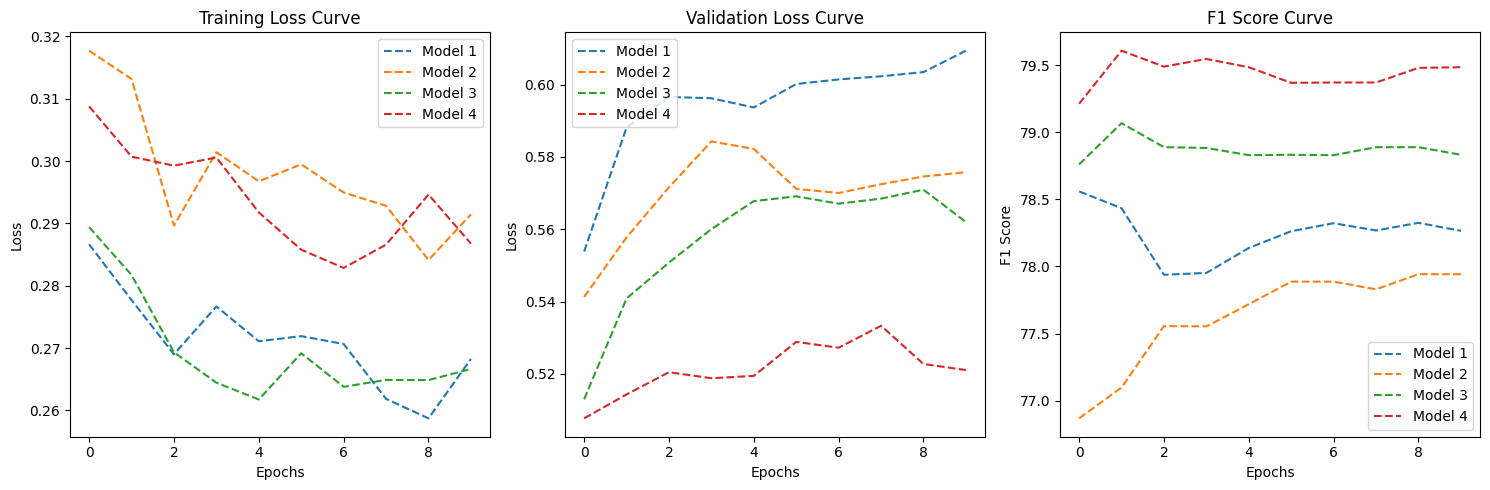

In [ ]:
plot_aggregated_results(models)

In [ ]:
def plot_aggregated_results(models):
    # Aggregate results across all folds
    avg_train_loss = np.mean([model.train_loss_list for model in models], axis=0)
    avg_val_loss = np.mean([model.val_loss_list for model in models], axis=0)
    avg_val_f1 = np.mean([model.val_f1_list for model in models], axis=0)

    # Get the maximum length among all data arrays
    max_length = max(len(avg_train_loss), len(avg_val_loss), len(avg_val_f1))

    # Plot the aggregated curves
    plt.figure(figsize=(15, 5))

    # Plot training loss curve
    plt.subplot(1, 3, 1)
    for i, model in enumerate(models):
        epochs = range(len(model.train_loss_list))
        plt.plot(epochs, model.train_loss_list, label=f'Model {i + 1}',linestyle='--')
    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, max_length - 1)  # Set x-axis range based on data length
    plt.legend()

    # Plot validation loss curve
    plt.subplot(1, 3, 2)
    for i, model in enumerate(models):
        epochs = range(len(model.val_loss_list))
        plt.plot(epochs, model.val_loss_list, label=f'Model {i + 1}',linestyle='--')
    plt.title('Validation Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, max_length - 1)  # Set x-axis range based on data length
    plt.legend()

    # Plot training F1 score curve
    plt.subplot(1, 3, 3)
    for i, model in enumerate(models):
        epochs = range(len(model.val_f1_list))
        plt.plot(epochs, model.val_f1_list, label=f'Model {i + 1}',linestyle='--')
    plt.title('F1 Score Curve')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.xlim(0, max_length - 1)  # Set x-axis range based on data length
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter to provide more space at the top
    plt.show()

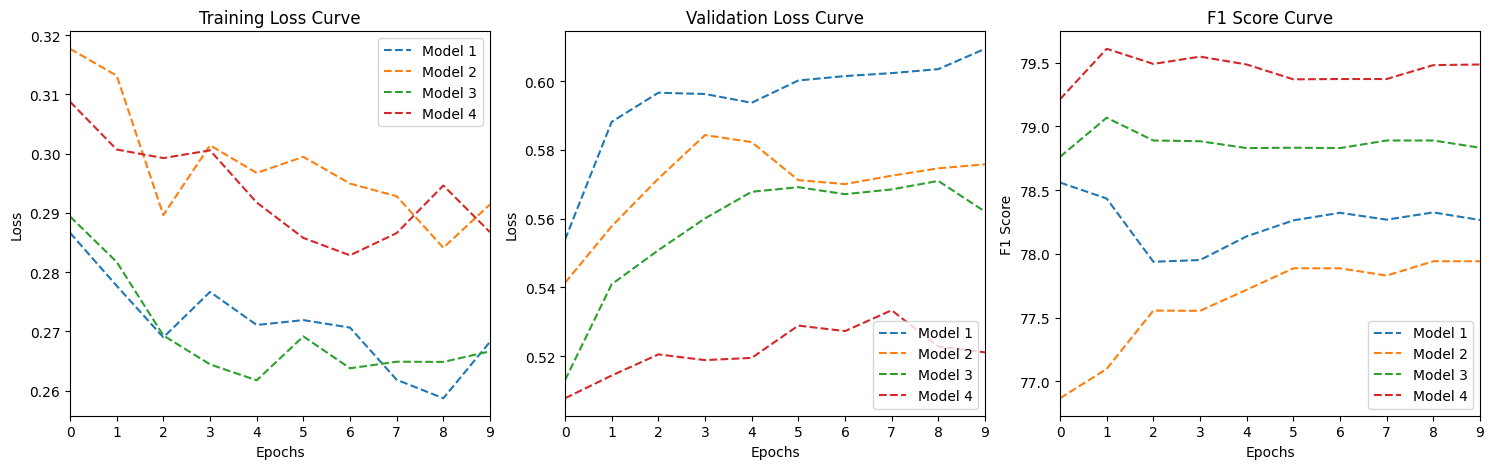

In [ ]:
plot_aggregated_results(models)

SAVE MODELS

In [ ]:
for i in range(len(models)):
  torch.save(models[i], "{0}dr_0.7_dr_0.7/model_{1}".format(model_path,i))

# BiLSTM

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM
from keras.layers import Bidirectional # new!
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot
from tensorboard.plugins.hparams import api as hp
import numpy as np
from sklearn.metrics import f1_score
import ast
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
# directory name
input_dir = '/content/drive/My Drive/HLT-PRJ/dataset2/clean_dataset_training/'
input_test_dir = "/content/drive/My Drive/HLT-PRJ/dataset2/dataset_test_evalita_preprocessed/"
# Spec
pd.set_option("display.max_colwidth", None)

In [ ]:
tsv_file = open(input_dir+"training_dataset.csv")

dataset = pd.read_csv(tsv_file,sep=',')

Vector Space Embedding

p_val=0.15: 15% of the data will be used for validation during training.

n_dim = 64: number of dimensions

n_unique_words = 25000: maximum number of unique words to be considered

max_length = 64: maximum length of sequences or data points.

pad_type = trunc_type = 'pre': Both pad_type and trunc_type are set to the string value 'pre' so padding and truncation of sequences will be applied at the beginning of the sequences.

batch_size = 64: number of samples that will be processed in one iteration during training. A batch size of 64 means that the model will be updated after processing 64 samples.

In [ ]:
p_val=0.15 # percentage of validation set

n_dim = 64
n_unique_words = 25000
max_length = 64 # doubled!
pad_type = trunc_type = 'pre'

# training
batch_size = 64

Preprocess data

import the word_tokenize function from the NLTK library, which is used for tokenizing words from a text.

Downloads the Punkt tokenizer models for tokenization.

all_words = []: Initializes an empty list called all_words to store all the individual words extracted from the text dataset.

for index, row in dataset.iterrows(): Iterates through each row of the dataset using the iterrows() method

tokenize_word = word_tokenize(row["text"]): Tokenizes the words in the "text" column of the current row using the word_tokenize function. The result is stored in the tokenize_word variable.

for word in tokenize_word: Iterates through each tokenized word in tokenize_word.

all_words.append(word): Appends each word to the all_words list. This effectively accumulates all the words from all rows in the dataset into a single list.

the all_words list will contain all the words from the "text" column of the dataset.

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

all_words = []
for index, row in dataset.iterrows():
  tokenize_word = word_tokenize(row["text"])
  for word in tokenize_word:
      all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
unique_words = set(all_words)
print(len(unique_words))

22830


Define two functions, sentence_to_emb2 and get_data_to_emb2, that convert sentences into word embeddings using a given word2vec model (w2v)

padding: If True, pads the sequence with zero vectors to match the specified length (truncate).

The function applies the sentence_to_emb2 function to each sentence in the input data and returns a NumPy array containing the word embeddings for all sentences.

In [ ]:
parole_non_ric = set()
def sentence_to_emb2(sentence, w2v, truncate = None, padding = False):
  global parole_non_ric
  pad_token = [0]*128
  s_emb = [ w2v[word.lower()] for word in sentence if word.lower() in w2v.key_to_index]
  parole_non_ric.update(set([ word.lower() for word in sentence if word.lower() not in w2v.key_to_index]))
  if truncate is not None:
    s_emb = s_emb[:truncate] #truncate
  if padding:
    s_emb += [pad_token] * (truncate - len(s_emb))
  return np.array(s_emb)

def get_data_to_emb2(data, w2v, truncate = None, padding = False):
  X = [sentence_to_emb2(ast.literal_eval(sentence), w2v, truncate, padding) for sentence in data]
  print(len(X))
  print(X[0])
  return np.array(X)


In [ ]:
!wget http://www.italianlp.it/twitter128.bin


--2023-12-02 16:00:18--  http://www.italianlp.it/twitter128.bin
Resolving www.italianlp.it (www.italianlp.it)... 146.48.92.46, 2a00:1620:c0:5c::8
Connecting to www.italianlp.it (www.italianlp.it)|146.48.92.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613808129 (585M) [application/octet-stream]
Saving to: ‘twitter128.bin’

twitter128.bin      100%[===================>] 585.37M  15.8MB/s    in 42s     

2023-12-02 16:01:01 (13.8 MB/s) - ‘twitter128.bin’ saved [613808129/613808129]



load a pre-trained word2vec model using the Gensim library

In [ ]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
w2v_path = "/content/drive/My Drive/HLT-PRJ/w2v/twitter128.bin"
w2v = KeyedVectors.load_word2vec_format(datapath(w2v_path), binary=True)

using the get_data_to_emb2 function to convert tokenized sentences from your dataset into word embeddings using a pre-trained word2vec model (w2v).

apply the get_data_to_emb2 function to the "tokens" column of your dataset, converting each tokenized sentence into word embeddings using the provided word2vec model. The resulting X_dev variable holds a NumPy array where each row corresponds to the word embeddings of a sentence in your development set.

In [ ]:
X_dev = get_data_to_emb2(dataset["tokens"], w2v, max_length , True)

6838
[[-0.51221186  0.33596092  0.33917063 ... -1.14244461 -0.04037737
   0.41360819]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
len(parole_non_ric)

2501

In [ ]:
dataset_other = dataset
dataset_other = dataset.drop(['text', 'id', 'hs', 'stereotype','tokens', 'hashtags'], axis=1)
dataset_other

,text_length,#C-L words,#?!,"#.,",#bad_words,%bad_words
0,5,0,0,0,0,0
1,120,10,0,5,0,0
2,101,0,0,0,1,6
3,86,8,0,1,2,18
4,118,0,0,2,0,0
...,...,...,...,...,...,...
6833,285,2,0,4,0,0
6834,277,0,2,3,0,0
6835,233,0,0,4,0,0
6836,206,2,0,2,0,0


In [ ]:
dataset['hs'] = pd.to_numeric(dataset['hs'], errors='coerce')


split your data into training and validation sets.

X_dev: The word embeddings obtained from tokenized sentences using the word2vec model.

dataset_other.values: Additional features for the main training set and .values returns the underlying NumPy array.

dataset[['hs']]: The target variable for the main training set. "hs" is the column containing the target values (labels). The double square brackets are used to keep the target variable as a DataFrame.

test_size=p_val: This parameter controls the proportion of the dataset that is allocated to the validation set. The p_val variable, defined earlier, represents the percentage of the validation set.

random_state=128: This sets the random seed for reproducibility. If you use the same seed value in the future, you should get the same train-validation split.

we end up having six variables (x_train, x_valid, x_train_extra, x_valid_extra, y_train, y_valid) representing the training and validation sets for your main features and additional features, along with their corresponding target variables

In [ ]:
x_train, x_valid, x_train_extra, x_valid_extra, y_train, y_valid = train_test_split(
                                                                   X_dev, dataset_other.values,
                                                                   dataset[['hs']],
                                                                   test_size=p_val,
                                                                   random_state=128
                                                                   )

organizing your training and validation input data into dictionaries, where each dictionary has two keys ("text" and "other")

In [ ]:
input_train = {"text": x_train, "other": x_train_extra}
input_val   = {"text": x_valid, "other": x_valid_extra}

In [ ]:
max_sent = 0


This function calculates the length of a tokenized comment and updates a global variable max_sent if the calculated length is greater than its current value.

After processing all comments, the global variable max_sent would store the length of the longest comment

In [ ]:
def comment_length(text):
    global max_sent
    text = ast.literal_eval(text)
    if len(text)>max_sent:
      max_sent = len(text)


In [ ]:
dataset['tokens'].apply(comment_length)
print(max_sent)

114


In [ ]:
x_train_extra.shape


(5812, 6)

Design Grid Search parameters

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

setting up hyperparameters for tuning the model using TensorFlow's Hyperparameter Tuning (HPT) functionality.


HP_NUM_UNITS: Defines a hyperparameter named 'num_units' with a discrete set of values, in this case, only one value, 64.

HP_DROPOUT: Defines a hyperparameter named 'dropout' with a real interval between 0.0 and 0.8.

HP_L2: Defines a hyperparameter named 'L2_reg' with a real interval between 0.0 and 0.0008. However, this hyperparameter is defined but not used later in the code.

HP_OPTIMIZER: Defines a hyperparameter named 'optimizer' with a discrete set of values, in this case, only one value, 'nadam'.

METRIC_ACCURACY: Defines the metric name for which you want to track performance during hyperparameter tuning. In this case, it's accuracy

In [ ]:

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.0, 0.8))
HP_L2 = hp.HParam('L2_reg', hp.RealInterval(0.0, 0.0008))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['nadam']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

callback class that extends tf.keras.callbacks.Callback. It calculates and logs the macro F1 score on the validation set at the end of each training epoch.

used during model training to monitor the F1 score on the validation set after each epoch

In [ ]:
class FCallback(tf.keras.callbacks.Callback):

    def __init__(self, validation = (), verbose = 0):
        self.validation = validation
        self.verbose = verbose

    def on_train_begin(self, logs={}):
        self.f1 = []
        self.val_f1 = []
    def on_epoch_end(self, epoch, logs=None):
        y_t =  self.validation[1]
        y_p =  np.where(self.model.predict(self.validation[0]) > 0.5, 1, 0)
        logs['val_f1'] =  f1_score(y_t, y_p, average='macro')
        if self.verbose >0:
          print("— val_f1: {}".format(logs['val_f1']))

defines the model. The model architecture includes a bidirectional LSTM layer for processing sequential data, along with additional dense layers for combining information from other features.


The bidirectional LSTM layers capture sequential patterns from the text data, and the additional features are incorporated through concatenation and subsequent dense layers. The final output is a binary classification using a sigmoid activation function


lstml1_in: Input layer for the text data with a shape of (max_length, 128). It assumes the input sequences have a maximum length of max_length and each word is represented by a vector of size 128.

lstml1_bd1: Bidirectional LSTM layer with return_sequences=True to return the full sequence of outputs. This layer processes the input sequences bidirectionally.

lstml1_bd2: Another Bidirectional LSTM layer without return_sequences=True. It processes the output sequence from the previous layer and aggregates information bidirectionally.

other_in: Input layer for other features with a shape of (6,). It assumes there are 6 additional features.

lconcat: Concatenation layer that concatenates the output from the last bidirectional LSTM layer and the other features.

dense1_layer, dense2_layer, dense3_layer: Dense layers with ReLU activation and L2 regularization. They serve as additional processing layers after concatenation.

lstml1_out: Output layer with a sigmoid activation function for binary classification.

model: A Keras Model is created with the specified inputs and outputs.

model.summary(): Prints a summary of the model architecture.

In [ ]:
def get_model(hparams):
  lstml1_in = tf.keras.layers.Input(name="text", shape =(max_length,128,))
  lstml1_bd1 = tf.keras.layers.Bidirectional(LSTM(hparams[HP_NUM_UNITS], dropout = hparams[HP_DROPOUT], return_sequences=True))(lstml1_in)
  lstml1_bd2 = tf.keras.layers.Bidirectional(LSTM(hparams[HP_NUM_UNITS], dropout = hparams[HP_DROPOUT]))(lstml1_bd1)

  other_in = tf.keras.layers.Input(name="other", shape =(6,))

  lconcat = tf.keras.layers.Concatenate(axis=1)([lstml1_bd2, other_in])
  dense1_layer = Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hparams[HP_L2]))(lconcat)
  dense2_layer = Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hparams[HP_L2]))(dense1_layer)
  dense3_layer = Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hparams[HP_L2]))(dense2_layer)

  lstml1_out = tf.keras.layers.Dense(1, activation='sigmoid')(dense3_layer)


  model = tf.keras.Model(inputs = [lstml1_in, other_in], outputs = lstml1_out)

  model.summary()

  return model

train and evaluate the model using the specified hyperparameters

In [ ]:
def train_test_model(hparams):

  model = get_model(hparams)
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='binary_crossentropy',
      metrics=['accuracy'],
  )

  f1_callback = FCallback(validation = (input_val, y_valid), verbose=True)

  #filepath = input_dir + "model_output/biLSTM/HP_NUM_UNITS={0}/HP_DROPOUT={1}/HP_L2={2}/".format(hparams[HP_NUM_UNITS],hparams[HP_DROPOUT],hparams[HP_L2])
  #filepath += "saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
  #checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')

  model.fit(input_train, y_train, batch_size=batch_size, validation_data=(input_val, y_valid), epochs=10, callbacks=[f1_callback]) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(input_val, y_valid)

  y_test_pred_tweets = np.where(model.predict(input_test_tweets) > 0.5, 1, 0)
  y_test_pred_news = np.where(model.predict(input_test_news) > 0.5, 1, 0)

  print("f1_score test tweets: {}".format(f1_score(y_test_tweets, y_test_pred_tweets,average="macro")))
  print("f1_score test news: {}".format(f1_score(y_test_news, y_test_pred_news,average="macro")))
  return accuracy


 run a trial with a specific set of hyperparameters, recording those hyperparameters

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
pip install --upgrade numpy
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.


iterate through different combinations of hyperparameters, enerates different sets of hyperparameters and runs a trial for each set using the run function

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in np.arange(HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value, 0.2):
      for L2_rate in np.arange(HP_L2.domain.min_value, HP_L2.domain.max_value, 0.0002):
        for optimizer in HP_OPTIMIZER.domain.values:
          hparams = {
              HP_NUM_UNITS: num_units,
              HP_DROPOUT: dropout_rate,
              HP_OPTIMIZER: optimizer,
              HP_L2: L2_rate,
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run('logs/hparam_tuning/' + run_name, hparams)
          session_num += 1



--- Starting trial: run-0
{'num_units': 64, 'dropout': 0.0, 'optimizer': 'nadam', 'L2_reg': 0.0}
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None, 64, 128)]            0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 64, 128)              98816     ['text[0][0]']                
 al)                                                                                              
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 128)                  98816     ['bidirectional[0][0]']       
 onal)                                                                                          

KeyboardInterrupt: ignored

Test Phase

In [ ]:
csv_test_tweets_file = open(input_test_dir+"test_dataset_tweets.csv")

testset_tweets = pd.read_csv(csv_test_tweets_file,sep=',')

csv_test_news_file = open(input_test_dir+"test_dataset_news.csv")

testset_news = pd.read_csv(csv_test_news_file,sep=',')

using the get_data_to_emb2 function to convert tokenized sentences from your test datasets into word embeddings using a pre-trained word2vec model (w2v)

In [ ]:
X_test_news = get_data_to_emb2(testset_news["tokens"], w2v, max_length , True)
X_test_tweets = get_data_to_emb2(testset_tweets["tokens"], w2v, max_length , True)

500
[[ 0.4473033  -1.85372221  1.80903184 ... -0.81329495 -0.37441084
   0.67255157]
 [ 0.65353721  2.91942644  0.83319777 ...  0.10994434  0.79807943
  -0.64684689]
 [ 0.27626377  0.63812095  1.54855597 ... -0.60746866  1.20815647
   0.78223377]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
1263
[[ 0.85021353  0.94971675  0.95175791 ...  0.66373271  0.95456082
   0.80749106]
 [ 1.86031258  0.98840606 -2.10821915 ...  1.14880133  0.14479998
  -0.10640591]
 [-1.32805312  0.75008422  0.24781393 ... -0.08247134 -0.89805609
  -0.75278544]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
testset_tweets_other = testset_tweets
testset_tweets_other = testset_tweets.drop(['text', 'id', 'hs', 'stereotype','tokens', 'hashtags'], axis=1)
testset_tweets_other

,text_length,#C-L words,#?!,"#.,",#bad_words,%bad_words
0,176,4,1,4,0,0
1,223,5,4,5,0,0
2,259,2,2,4,1,1
3,95,8,0,2,1,7
4,245,94,2,0,0,0
...,...,...,...,...,...,...
1258,216,0,0,5,1,2
1259,159,81,3,1,1,4
1260,278,32,4,7,1,1
1261,88,0,1,3,0,0


In [ ]:
testset_news_other = testset_news
testset_news_other = testset_news.drop(['text', 'id', 'hs', 'stereotype','tokens','hashtags'], axis=1)
testset_news_other

,text_length,#C-L words,#?!,"#.,",#bad_words,%bad_words
0,102,0,1,5,0,0
1,108,0,0,1,0,0
2,48,0,0,0,0,0
3,112,0,0,5,0,0
4,117,0,0,6,0,0
...,...,...,...,...,...,...
495,80,0,0,2,0,0
496,60,0,0,0,0,0
497,86,0,0,2,0,0
498,92,0,0,0,0,0


In [ ]:
input_test_tweets   = {"text": X_test_tweets, "other": testset_tweets_other.values}
y_test_tweets = testset_tweets[['hs']]

In [ ]:
input_test_news   = {"text": X_test_news, "other": testset_news_other.values}
y_test_news = testset_news[['hs']]

preparing data for k-fold cross-validation

x_kfold: the main features for k-fold cross-validation, assigning it the training data.

x_other_kfold: additional features for k-fold cross-validation. It is assigned the value of dataset_other, which contain non-textual features.

y_kfold: Represents the target labels for k-fold cross-validation. It is assigned the value of dataset[['hs']]

In k-fold cross-validation, the dataset is divided into k subsets, and the model is trained and evaluated k times, each time using a different subset as the validation set and the remaining data as the training set

In [ ]:
x_kfold = X_dev
x_other_kfold = dataset_other
y_kfold = dataset[['hs']]

In [ ]:
dataset.fillna(0, inplace=True)


In [ ]:
print(testset_tweets['hs'].isna().sum())
print(testset_news['hs'].isna().sum())
print(dataset['hs'].isna().sum())

0
0
0


performs k-fold cross-validation training and plots the training loss, validation loss, and validation F1 score for each fold

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

# Define your FCallback and get_model functions

# Function to train and plot metrics
def train_test_model_with_kfold(hparams):
    number_of_splits = 5
    cv_kfold = StratifiedKFold(n_splits=number_of_splits, shuffle=True, random_state=100)
    models = []

    # Create a single figure and subplots outside the loop
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    # Initialize min_loss and min_f1 to track the minimum values for setting y-axis limits
    min_loss = float('inf')
    min_f1 = float('inf')

    for train_index, validation_index in cv_kfold.split(x_kfold, y_kfold):
        model = get_model(hparams)
        model.compile(
            optimizer=hparams[HP_OPTIMIZER],
            loss='binary_crossentropy',
            metrics=['accuracy'],
        )

        input_train_kfold = {"text": x_kfold[train_index], "other": x_other_kfold.loc[train_index]}
        input_val_kfold = {"text": x_kfold[validation_index], "other": x_other_kfold.loc[validation_index]}
        y_train_kfold = y_kfold.loc[train_index]
        y_valid_kfold = y_kfold.loc[validation_index]

        f1_callback = FCallback(validation=(input_val_kfold, y_valid_kfold))

        history = model.fit(
            input_train_kfold,
            y_train_kfold,
            batch_size=batch_size,
            validation_data=(input_val_kfold, y_valid_kfold),
            epochs=10,
            callbacks=[f1_callback]
        )

        # Plot training loss and validation loss on the same set of axes
        axes[0].plot(history.history['loss'], label=f'Model {len(models) + 1}', linestyle='--')
        axes[1].plot(history.history['val_loss'], label=f'Model {len(models) + 1}', linestyle='--')

        # Plot F1 score on the same set of axes
        axes[2].plot(history.history['val_f1'], label=f'Model {len(models) + 1}', linestyle='--')

        _, accuracy = model.evaluate(input_val_kfold, y_valid_kfold)

        y_test_pred_tweets = np.where(model.predict(input_test_tweets) > 0.5, 1, 0)
        y_test_pred_news = np.where(model.predict(input_test_news) > 0.5, 1, 0)

        print("f1_score test tweets: {}".format(f1_score(y_test_tweets, y_test_pred_tweets, average="macro")))
        print("f1_score test news: {}".format(f1_score(y_test_news, y_test_pred_news, average="macro")))

        models.append(model)

        # Update min_loss and min_f1
        min_loss = min(min_loss, min(history.history['loss']), min(history.history['val_loss']))
        min_f1 = min(min_f1, min(history.history['val_f1']))

        max_epochs = max(len(history.history['loss']), len(history.history['val_loss']))

        max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
        min_loss = min(min(history.history['loss']), min(history.history['val_loss']))
        max_f1 = max(history.history['val_f1'])
        min_f1 = min(history.history['val_f1'])


    # Set labels and limits for the entire plot
    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].set_ylim(ymin=min(0.3, min_loss), ymax=max(1.0, max_loss))  # Set ylim to cover the entire range of loss values
    axes[0].set_xlim(xmin=0, xmax=max_epochs-1)  # Set xlim to cover the entire range of epochs

    axes[1].set_title('Validation Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].set_ylim(ymin=min(0.4, min_loss), ymax=max(1.0, max_loss))  # Set ylim to cover the entire range of loss values
    axes[1].set_xlim(xmin=0, xmax=max_epochs-1)  # Set xlim to cover the entire range of epochs

    axes[2].set_title('Validation F1 Score')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('F1 Score')
    axes[2].legend()
    axes[2].set_ylim(ymin=min(0.3, min_f1), ymax=max(0.8, max_f1))  # Set ylim to cover the entire range of F1 score values
    axes[2].set_xlim(xmin=0, xmax=max_epochs-1)  # Set xlim to cover the entire range of epochs

    plt.show()

    return models

takes a list of models and a test input as arguments. It then makes predictions using each model, combines the predictions into an ensemble, and returns the final predictions.

This function essentially performs a majority vote across the ensemble members for each data point, considering the class with the highest count as the final prediction.

In [ ]:
def predict_with_ensemble(models, test_input):
  # make predictions
  results = []
  y_predict = [np.squeeze(np.where(model.predict(test_input) > 0.5, 1,0).reshape(1,-1)) for model in models]
  # sum across ensemble members
  y_predict = np.array(y_predict)

  for i in range(y_predict.shape[1]):
    counts = np.bincount(y_predict[:,i])
    results.append(np.argmax(counts))
  # argmax across classes
  return results

perform k-fold cross-validation, train models, and then use an ensemble of these models to make predictions on the test datasets.

encapsulate the entire process of hyperparameter tuning, k-fold cross-validation, training models, and evaluating them on the test datasets using an ensemble approach

In [ ]:
def run_with_kfold(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    #print({h.name: hparams[h] for h in hparams})
    models = train_test_model_with_kfold(hparams)
    y_test_pred_tweets = predict_with_ensemble(models, input_test_tweets)
    y_test_pred_news = predict_with_ensemble(models, input_test_news)

    print("f1_score test tweets: {}".format(f1_score(y_test_tweets, y_test_pred_tweets,average="macro")))
    print("f1_score test news: {}".format(f1_score(y_test_news, y_test_pred_news,average="macro")))
    return models

In [ ]:
y_test_pred_tweets = predict_with_ensemble(models, input_test_tweets)
y_test_pred_news = predict_with_ensemble(models, input_test_news)

print("f1_score test tweets: {}".format(f1_score(y_test_tweets, y_test_pred_tweets,average="macro")))
print("f1_score test news: {}".format(f1_score(y_test_news, y_test_pred_news,average="macro")))

16/16 [==============================] - 0s 6ms/step
f1_score test tweets: 0.7473275354441273
f1_score test news: 0.6775541580036217


running the run_with_kfold function to perform k-fold cross-validation and evaluate models based on these hyperparameters

--- Starting trial: run-test
{'num_units': 64, 'dropout': 0.4, 'optimizer': 'nadam', 'L2_reg': 0.0}
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None, 64, 128)]            0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 64, 128)              98816     ['text[0][0]']                
 al)                                                                                              
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 128)                  98816     ['bidirectional[0][0]']       
 onal)                                                                                       

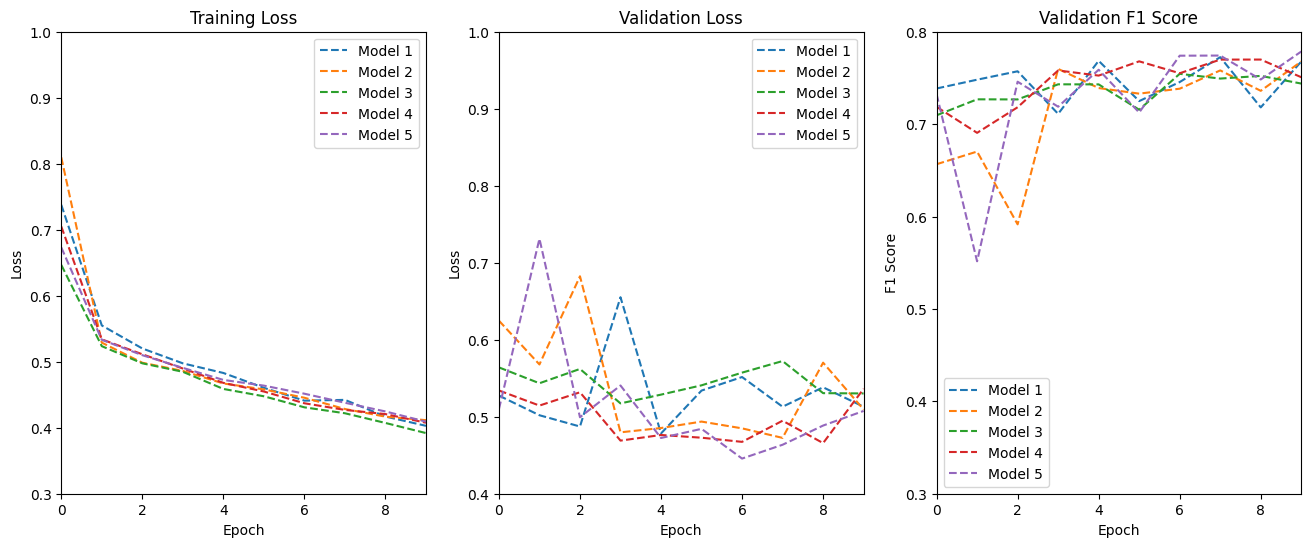

16/16 [==============================] - 0s 10ms/step
f1_score test tweets: 0.7523529411764707
f1_score test news: 0.6775541580036217


In [ ]:
hparams = {
    HP_NUM_UNITS: 64,
    HP_DROPOUT: 0.4,
    HP_OPTIMIZER: "nadam",
    HP_L2: 0.0000,
}
run_name = "run-test"
print('--- Starting trial: %s' % run_name)
print({h.name: hparams[h] for h in hparams})
models = run_with_kfold('logs/hparam_tuning/' + run_name, hparams)

In [ ]:
for i in range(len(models)):
  models[i].save(
      input_dir+"model_output/biLSTM/{0}_{1}_{2}_{3}/model_{4}.h5".format(
          hparams[HP_NUM_UNITS],hparams[HP_DROPOUT],hparams[HP_OPTIMIZER],hparams[HP_L2],i)
      )


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#////////////////////////////////////////   END   ////////////////////////////////////////////////////////////////